In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [9]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
realtrace = sorted(glob.glob('*BLN*realtrace.npy'))
base = sorted(glob.glob('*BLN*_baseline.npy'))
bind = sorted(glob.glob('*BLN*_binarised.npy'))
cal = sorted(glob.glob('*BLN*_modelcal.npy'))
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
coordlist = sorted(glob.glob('*PTZ20*realcoord.npy'))
coordlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy']

* sliding window: pre-seizure, seizure and post-seizure
* identify cell populations involved in both
* are there reliable cell populatons across seizures and fish?
* try removing first factor - is just average

In [12]:
cells.shape

(9851, 4)

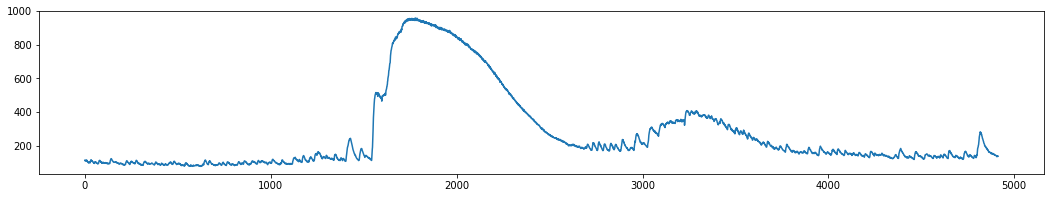

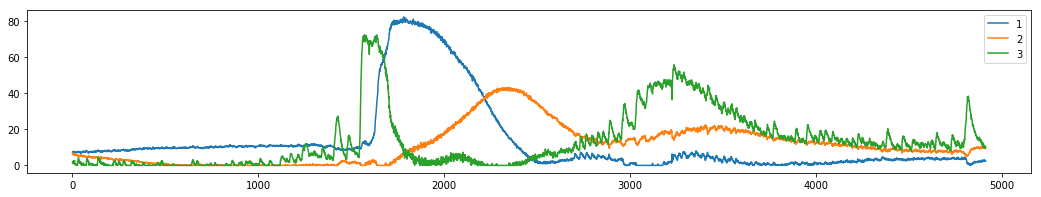

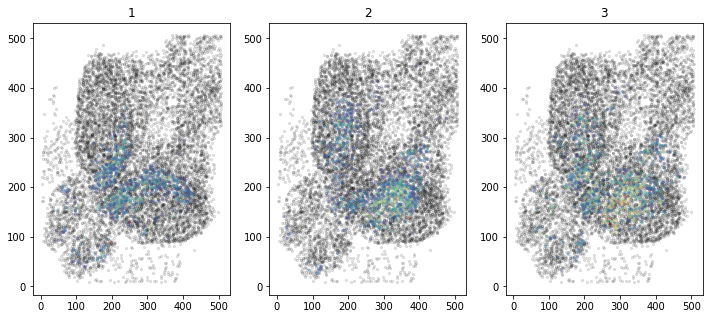

In [14]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 8, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

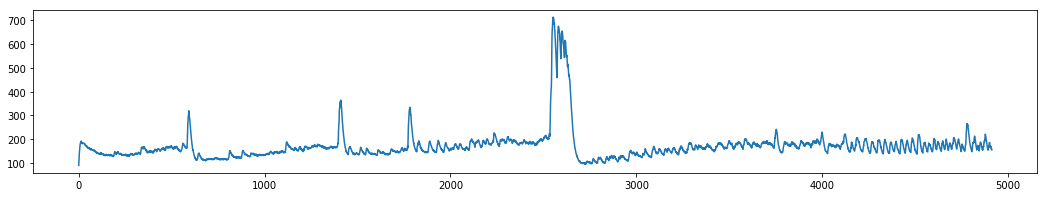

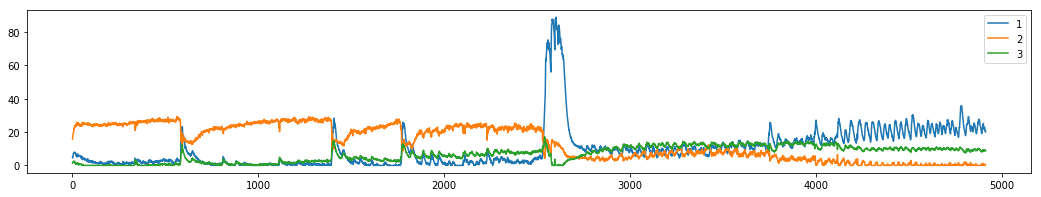

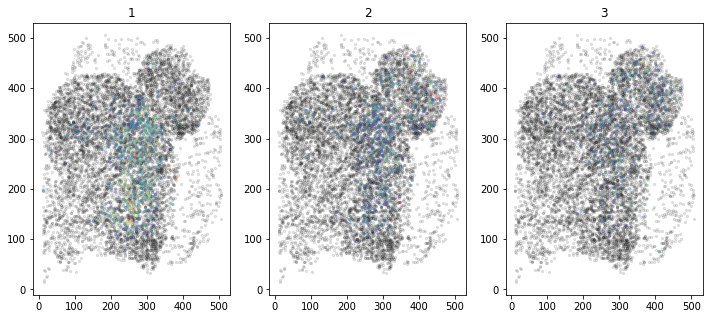

In [15]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 0, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

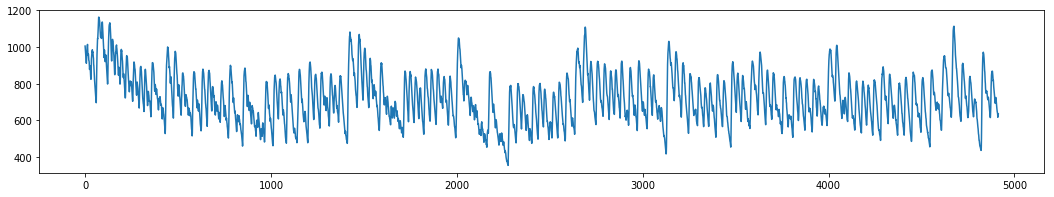

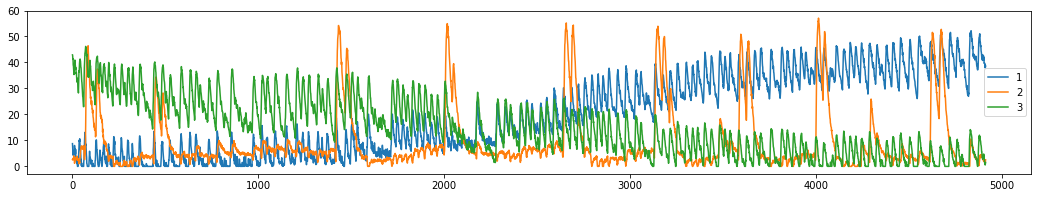

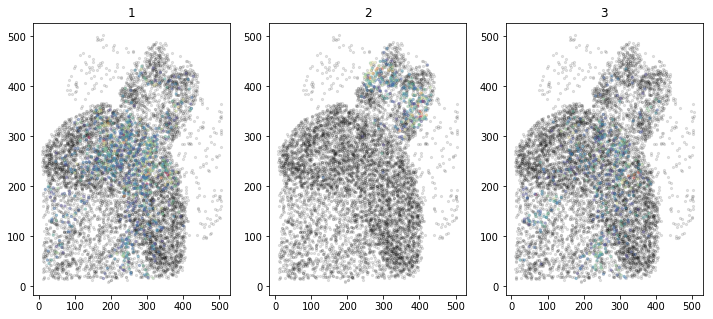

In [16]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 1, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

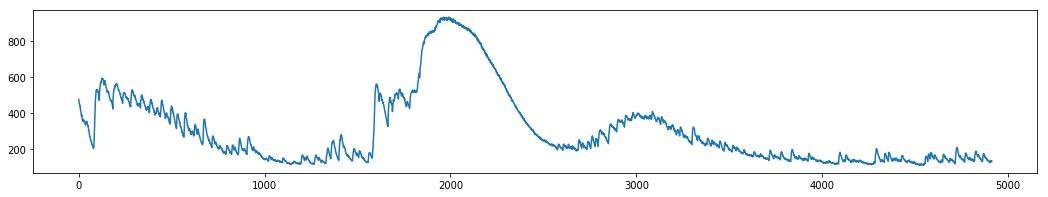

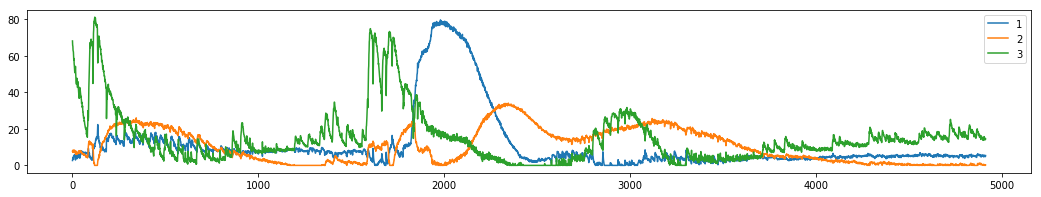

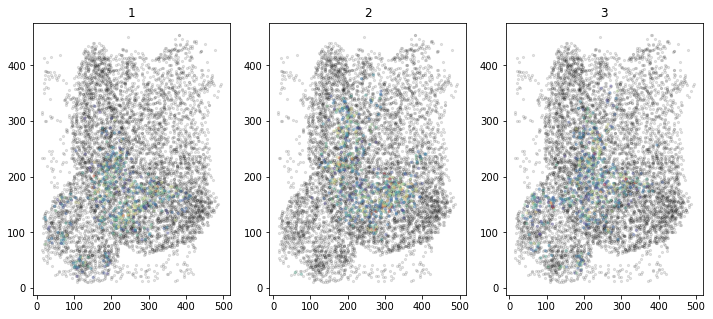

In [17]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 2, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

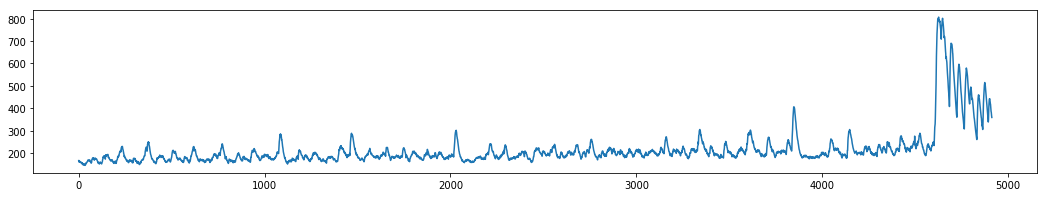

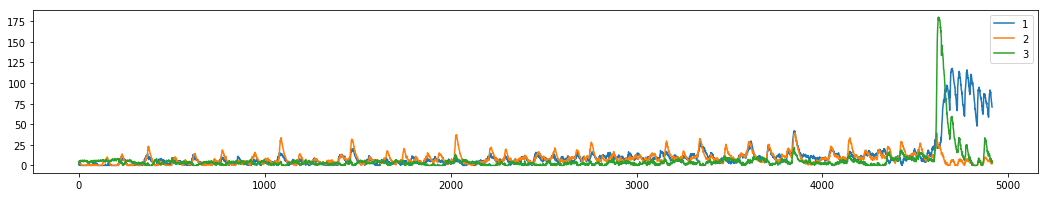

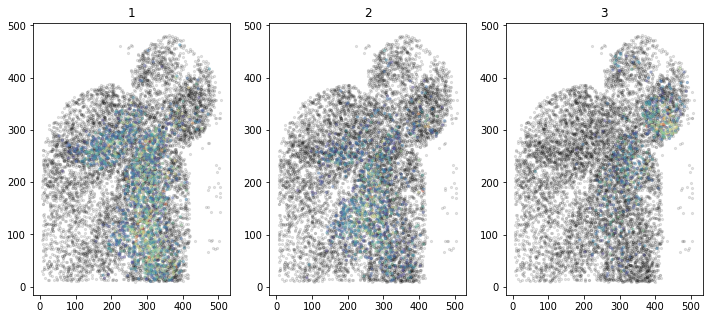

In [18]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 3, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

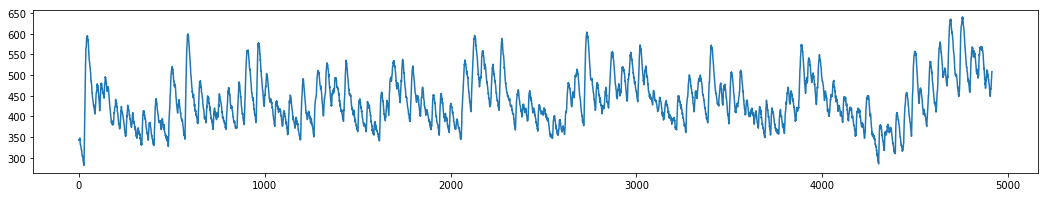

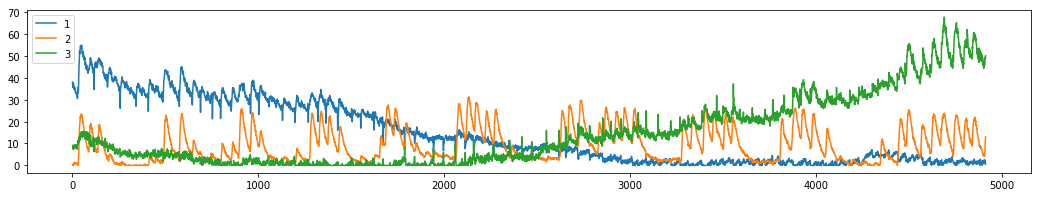

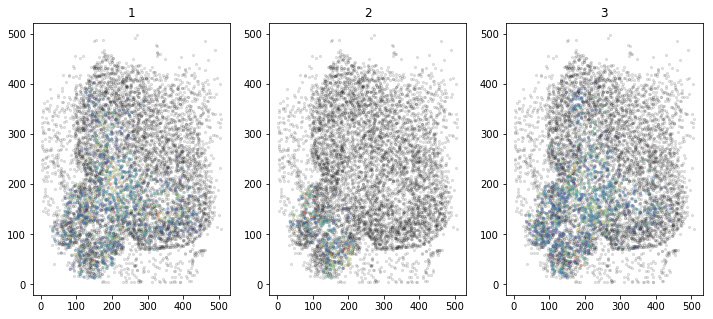

In [19]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 4, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

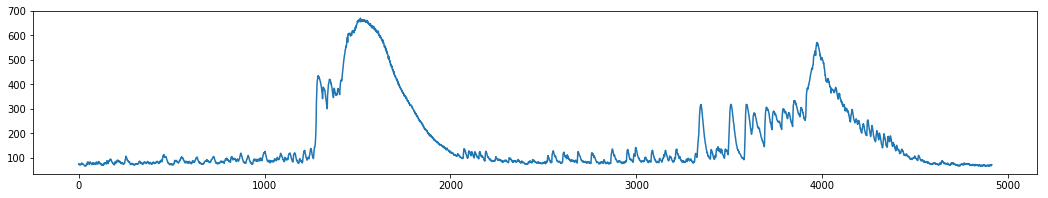

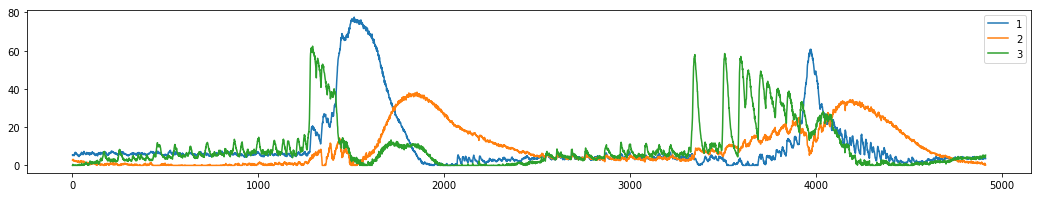

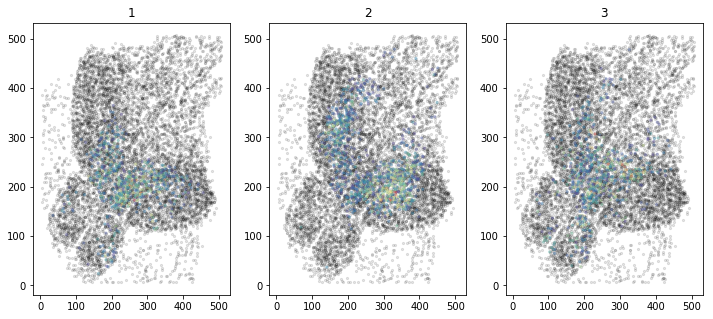

In [20]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 5, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

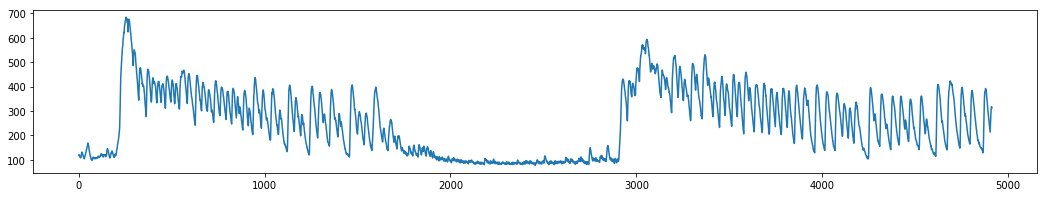

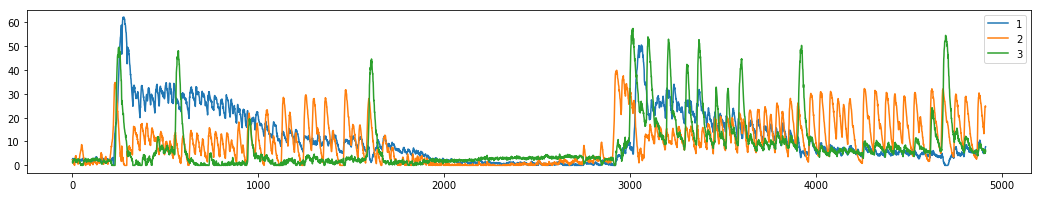

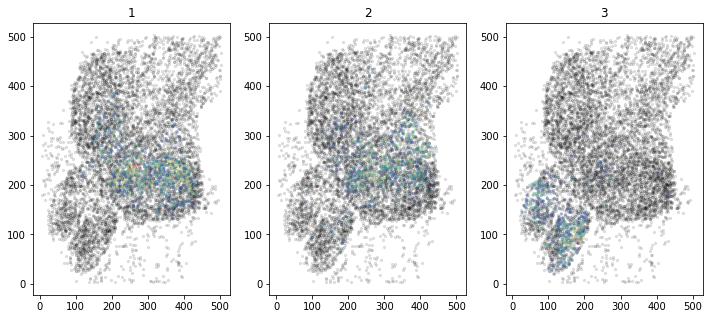

In [21]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 6, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

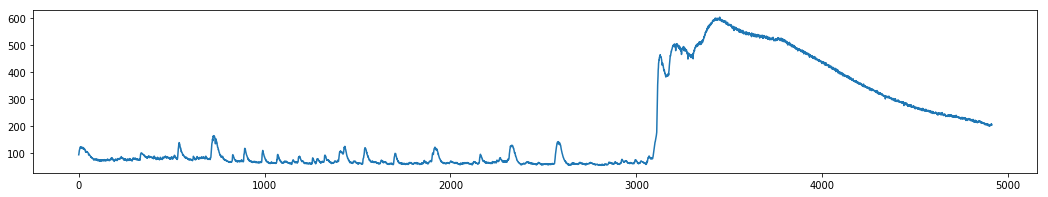

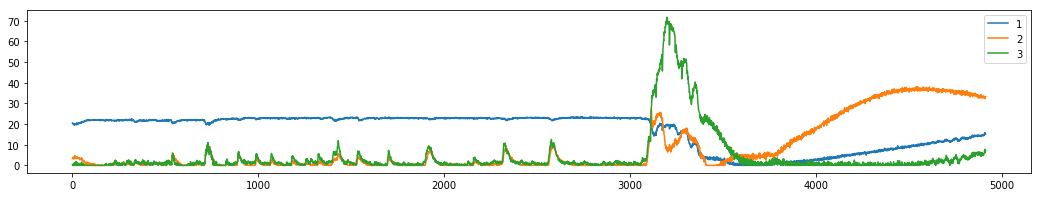

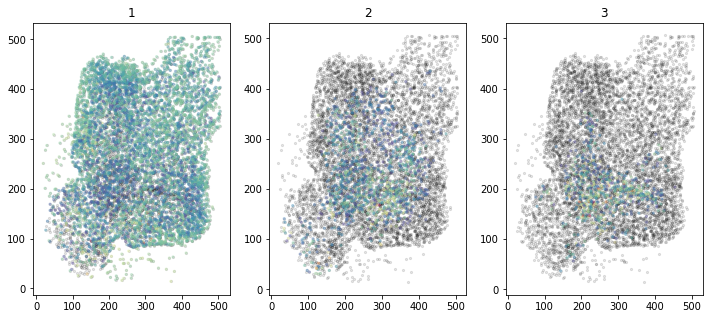

In [22]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 7, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

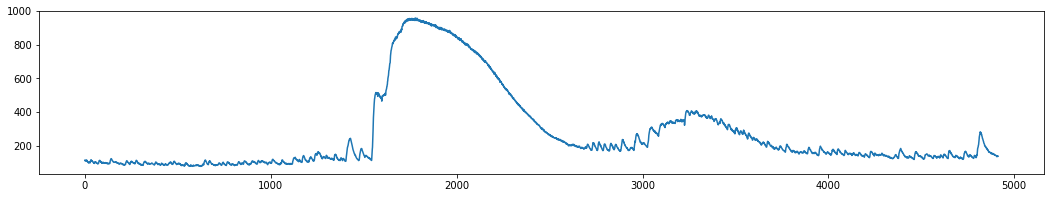

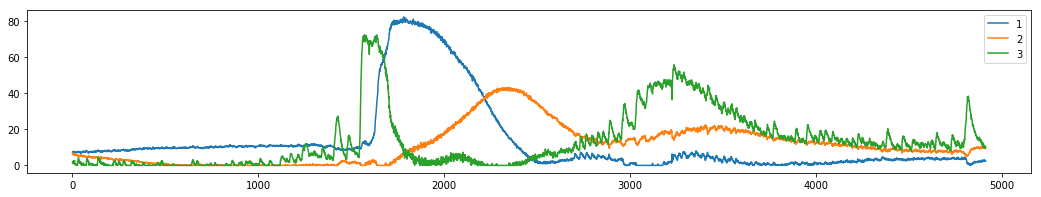

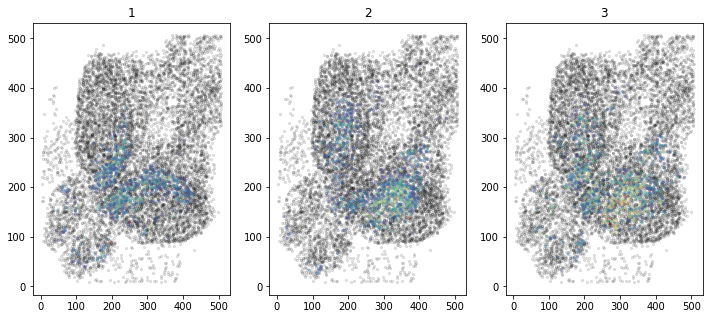

In [23]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 8, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

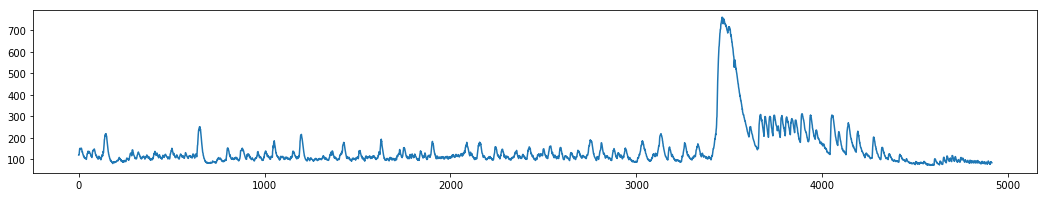

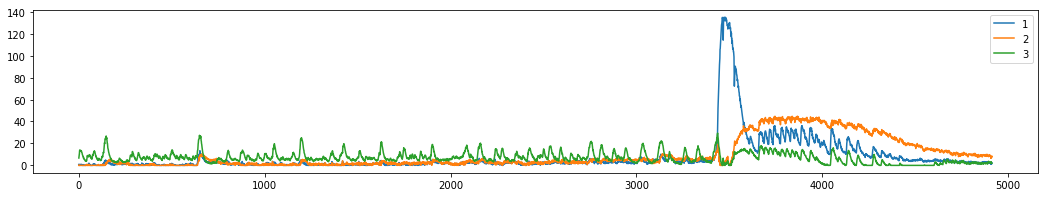

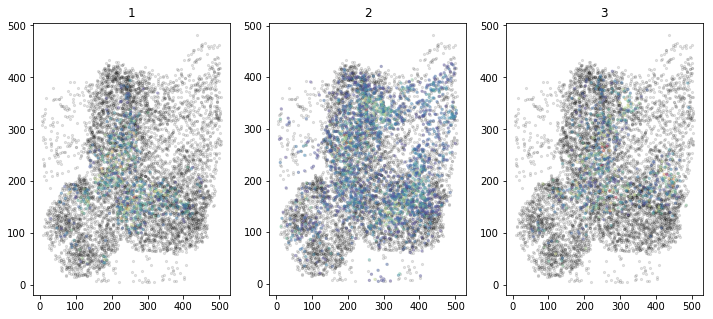

In [24]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 9, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()

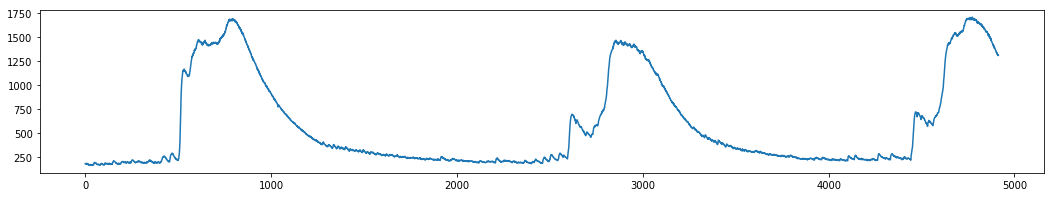

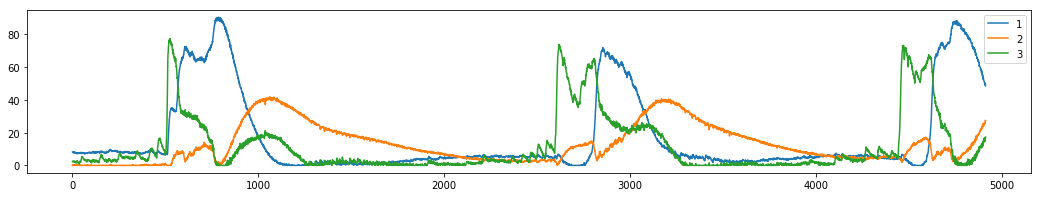

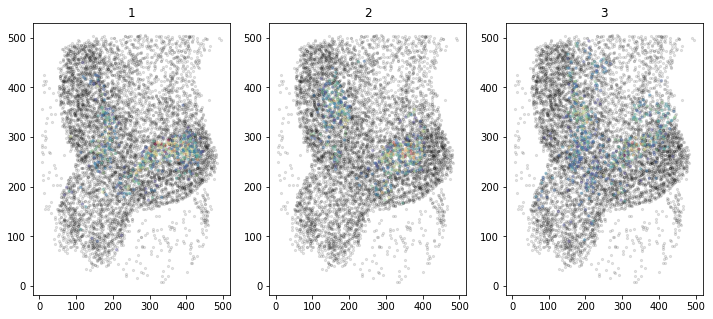

In [25]:
#matrix factorisation - time frames
#---------------------------------
from sklearn import decomposition
i, n_components, scale = 10, 4, 3
coordz = np.load(coordlist[i])
p20 = np.load(p20raw[i])

fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

nmf = decomposition.NMF(n_components)
fit = nmf.fit(p20 - np.min(p20))
cells = nmf.fit_transform(p20 - np.min(p20))

fig, ax = plt.subplots(figsize= (18,3))
for i in range(n_components-1):
    plt.plot(fit.components_[i+1], label = str(i + 1))
    plt.legend()

fig, axarr = plt.subplots(1,3, figsize= (12,5))
for i in range(n_components-1):
    master = axarr[i].scatter(coordz[:,0], coordz[:,1], s=5, c = 'k', alpha = 0.1)
    dotplot = axarr[i].scatter(coordz[:,0][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], coordz[:,1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]], s=5, c = cells[:,i+1][np.where(cells[:,i+1] > scale*(np.std(cells[:,i+1])))[0]] , cmap = 'Spectral_r', alpha = 0.3)
    axarr[i].set_title(str(i + 1))
plt.show()